# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [2]:
import pandas as pd

In [3]:
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')

In [4]:
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [5]:
df = pd.DataFrame(df,columns=['l','k','solution','gcd','n','smax']) 

In [6]:
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,NaN
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,NaN
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,NaN
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,NaN
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,NaN
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,NaN
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,NaN
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,NaN
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,NaN


In [8]:
a=abs(df.solution.apply(max)) # toma el valor maximo de las listas soluciones

df['smax']=a

df


,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [9]:
df = pd.DataFrame(df,columns=['l','k','solution','gcd','n','smax','sum_s','sum_s3']) # agregar columnas 'sum_s' y sum_s3'

In [10]:
df

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,NaN,NaN
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,NaN,NaN
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,NaN,NaN
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,NaN,NaN
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,NaN,NaN
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,NaN,NaN
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,NaN,NaN
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,NaN,NaN
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,NaN,NaN


In [11]:
# Columna correspondiente a la suma  de los valores en solution

b=(df.solution.apply(sum))

df['sum_s']=b

df

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,NaN
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,NaN
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,0,NaN
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,NaN
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,0,NaN
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,NaN
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,NaN
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,0,NaN
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,NaN


In [12]:
# Columna correspondiente a la suma al cubo de los valores en solution
c = b**3

df['sum_s3']=c

df

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1113674432)
a = np.random.randint(0,390073); print(a)

28769


In [14]:
df.iloc[28769] 

l                                      [2, -2, 0, 1]
k                                [-1, -2, 0, -3, -4]
solution    [1, 2, 4, -8, -10, 12, 17, -19, -23, 24]
gcd                                                2
n                                                 10
smax                                              24
sum_s                                              0
sum_s3                                             0
Name: 28769, dtype: object

In [15]:
k = [2,8,7,6,9] 
p = np.poly1d(k)        # Polinomio 
print(p)

   4     3     2
2 x + 8 x + 7 x + 6 x + 9


In [16]:
rr = p.roots
rr

array([-3.        +0.j        , -1.40445154+0.j        ,
        0.20222577+1.01347783j,  0.20222577-1.01347783j])

In [17]:
dp = p.deriv()  # Derivada polinomio
print(dp)

   3      2
8 x + 24 x + 14 x + 6


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

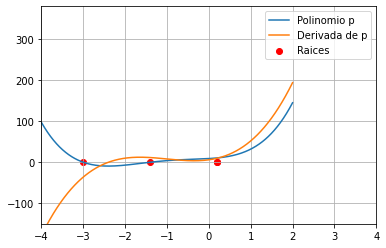

In [32]:
x =np.linspace(-4,2,500)
plt.plot(x,p(x),label='Polinomio p' )
plt.plot(x,dp(x),label='Derivada de p')
plt.scatter(rr, p(rr), color='r', label='Raices' )
plt.legend()
plt.xlim(-4,4)
plt.ylim(-150,380)
plt.grid()
plt.show

In [ ]:
for i in range(len('solution')):
  #for j in range(len('solution')):
  i = i**3
print(i)

343


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1113674432)
a = np.random.randint(1,6); print(a)

2


In [34]:
P = np.random.rand(); print(P)

0.851209333227052


<function matplotlib.pyplot.show>

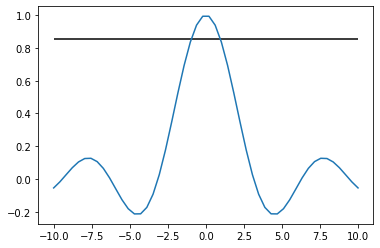

In [35]:
x = np.linspace(-10,10)
y = np.sin(x)/x 
plt.plot(x,y)
plt.hlines(0.851209333227052,-10,10)
plt.show

#Mirar la gráfica para tener una idea general de las raices.

In [36]:
def  sec(f,p0,p1,eps,Nmax):

    q0 = f(p0)
    q1 = f(p1)
    i = 2
    while i<Nmax:
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        print (i, p, f(p))  
 
        if ( np.abs(p - p1) < eps ): break 
        i += 1

        p0 = p1; q0 = q1
        p1 = p; q1 = f(p)
        
    return p

In [39]:
f = lambda x :(np.sin(x)/x)-P

In [38]:
rr1 = sec(f,0.5,1.4,1e-10,50); print(rr1)

2 0.8799740062292503 0.024637352268136348
3 0.9544826656161445 0.0037195656905495422
4 0.9677316703364282 -0.00014562224291703174
5 0.9672325096702467 7.814240016168483e-07
6 0.9672351739213096 1.619333556135416e-10
7 0.9672351744735329 -3.3306690738754696e-16
8 0.9672351744735318 1.1102230246251565e-16
0.9672351744735318


In [40]:
rr2 = sec(f,-2,-0.5,1e-10,50); print(rr2)

2 -0.8202337544722381 0.040372216570200625
3 -1.0124239925516878 -0.01349846491341955
4 -0.9642665697389466 0.0008694316762716259
5 -0.9671806767955804 1.5980493646927663e-05
6 -0.9672352421535682 -1.984644237840172e-08
7 -0.9672351744719921 4.516387264175137e-13
8 -0.9672351744735324 0.0
-0.9672351744735324


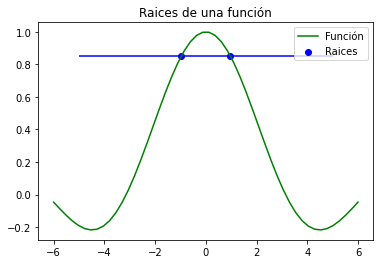

In [41]:
xp = np.linspace(-6,6)
xr = np.array([rr1,rr2])
y = f(xp) + P

plt.title('Raices de una función')
plt.plot(xp,y, color = 'green', label='Función')
plt.scatter(xr,f(xr)+P, color = 'blue', label='Raices')
plt.hlines(P, -5,5, color = 'blue')
plt.legend()
plt.show()